In [1]:
import os
import random
import cv2
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Function to display images along with their file names, ages, and labels
def display_images_with_metadata(image_paths, data):
    plt.figure(figsize=(20, 10))
    for i, image_path in enumerate(image_paths):
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
        file_name = os.path.basename(image_path)
        age = data.loc[data['Image-ID'] == file_name, 'Age'].values[0]
        labels = data.loc[data['Image-ID'] == file_name, 'Labels'].values[0].replace('|', ', ')
        plt.subplot(2, 5, i + 1)
        plt.imshow(img)
        plt.title(f"{file_name}\nAge: {age}\nLabels: {labels}")  # Display the file name, age, and labels
        plt.axis('off')
    plt.show()

In [3]:
# Path to your image folder
image_folder = 'C:/Users/nithi/Desktop/FAU/Semester-4/Master_Thesis_Federated_Learning/Dataset/sample/images'

# Path to your CSV file containing metadata
csv_file_path = 'C:/Users/nithi/Desktop/FAU/Semester-4/Master_Thesis_Federated_Learning/Dataset/sample_labels.csv'

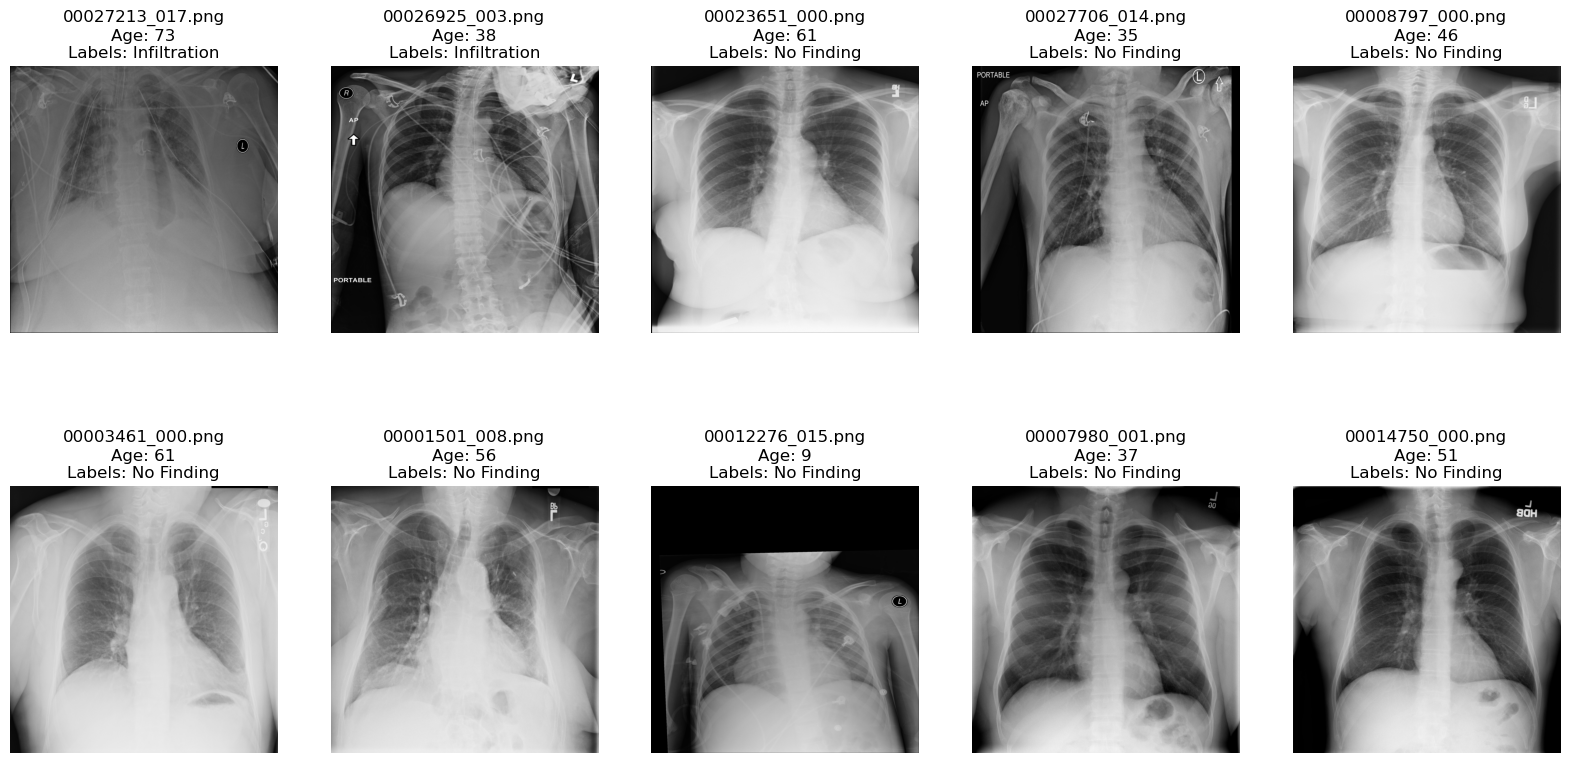

In [5]:
# Read the metadata from the CSV file
metadata = pd.read_csv(csv_file_path)

# Extract only numeric part from the 'Age' column
metadata['Age'] = metadata['Age'].str.extract('(\d+)').astype(int)

# Get list of all image files in the folder
image_files = [os.path.join(image_folder, file) for file in os.listdir(image_folder) if file.endswith(('png', 'jpg', 'jpeg', 'bmp', 'gif'))]

# Seed the random number generator with the current system time
random.seed(None)

# Select 10 random images
random_images = random.sample(image_files, 10)

# Display the images with file names, ages, and labels
display_images_with_metadata(random_images, metadata)